<a href="https://colab.research.google.com/github/aayushhh-operator/Crime-Forecasting/blob/Udit/GDG_RP_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/Datasets/Crime_Data_from_2010_to_2019.csv")
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133069 entries, 0 to 2133068
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [ ]:

df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

df = df.dropna(subset=['DATE OCC'])

df = df.set_index('DATE OCC')

df.index.min(), df.index.max(), df.shape

<ipython-input-4-ee957aad10ec>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')


(Timestamp('2010-01-01 00:00:00'),
 Timestamp('2019-12-31 00:00:00'),
 (2133069, 27))

In [ ]:
# Aggregate crime counts per day
df_daily = df.resample('D').size().reset_index(name='crime_count')

# Display the first few rows
df_daily.head()


,DATE OCC,crime_count
0,2010-01-01,2354
1,2010-01-02,535
2,2010-01-03,539
3,2010-01-04,559
4,2010-01-05,548


In [ ]:
# Reset index to bring back 'DATE OCC'
df = df.reset_index()

# Ensure TIME OCC is a 4-digit string (e.g., 1350 → "13:50")
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

# Extract hours and minutes properly
df['hour'] = df['TIME OCC'].str[:2]
df['minute'] = df['TIME OCC'].str[2:]

# Create a full timestamp column
df['datetime'] = pd.to_datetime(df['DATE OCC'].dt.strftime('%Y-%m-%d') + ' ' + df['hour'] + ':' + df['minute'], errors='coerce')

# Drop unnecessary columns
df = df.drop(columns=['hour', 'minute', 'TIME OCC', 'DATE OCC'])

# Set 'datetime' as the new index
df = df.set_index('datetime')

# Display the first few rows
df.head()



,DR_NO,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
datetime,,,,,,,,,,,,,,,,,,,,,
2010-02-20 13:50:00,1307355,02/20/2010 12:00:00 AM,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
2010-09-12 00:45:00,11401303,09/13/2010 12:00:00 AM,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2010-08-09 15:15:00,70309629,08/09/2010 12:00:00 AM,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
2010-01-05 01:50:00,90631215,01/05/2010 12:00:00 AM,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
2010-01-02 21:00:00,100100501,01/03/2010 12:00:00 AM,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [ ]:
# Resample crime counts at different time granularities
df_hourly = df.resample('H').size().reset_index(name='crime_count')
df_daily = df.resample('D').size().reset_index(name='crime_count')
df_weekly = df.resample('W').size().reset_index(name='crime_count')
df_monthly = df.resample('M').size().reset_index(name='crime_count')

# Display the first few rows of each
df_hourly.head(), df_daily.head(), df_weekly.head(), df_monthly.head()


<ipython-input-7-f4bf6ca26c1f>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').size().reset_index(name='crime_count')
<ipython-input-7-f4bf6ca26c1f>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').size().reset_index(name='crime_count')


(             datetime  crime_count
 0 2010-01-01 00:00:00          467
 1 2010-01-01 01:00:00           92
 2 2010-01-01 02:00:00           41
 3 2010-01-01 03:00:00           38
 4 2010-01-01 04:00:00           34,
     datetime  crime_count
 0 2010-01-01         2354
 1 2010-01-02          535
 2 2010-01-03          539
 3 2010-01-04          559
 4 2010-01-05          548,
     datetime  crime_count
 0 2010-01-03         3428
 1 2010-01-10         4043
 2 2010-01-17         4165
 3 2010-01-24         3804
 4 2010-01-31         4084,
     datetime  crime_count
 0 2010-01-31        19524
 1 2010-02-28        16025
 2 2010-03-31        18131
 3 2010-04-30        17778
 4 2010-05-31        17723)

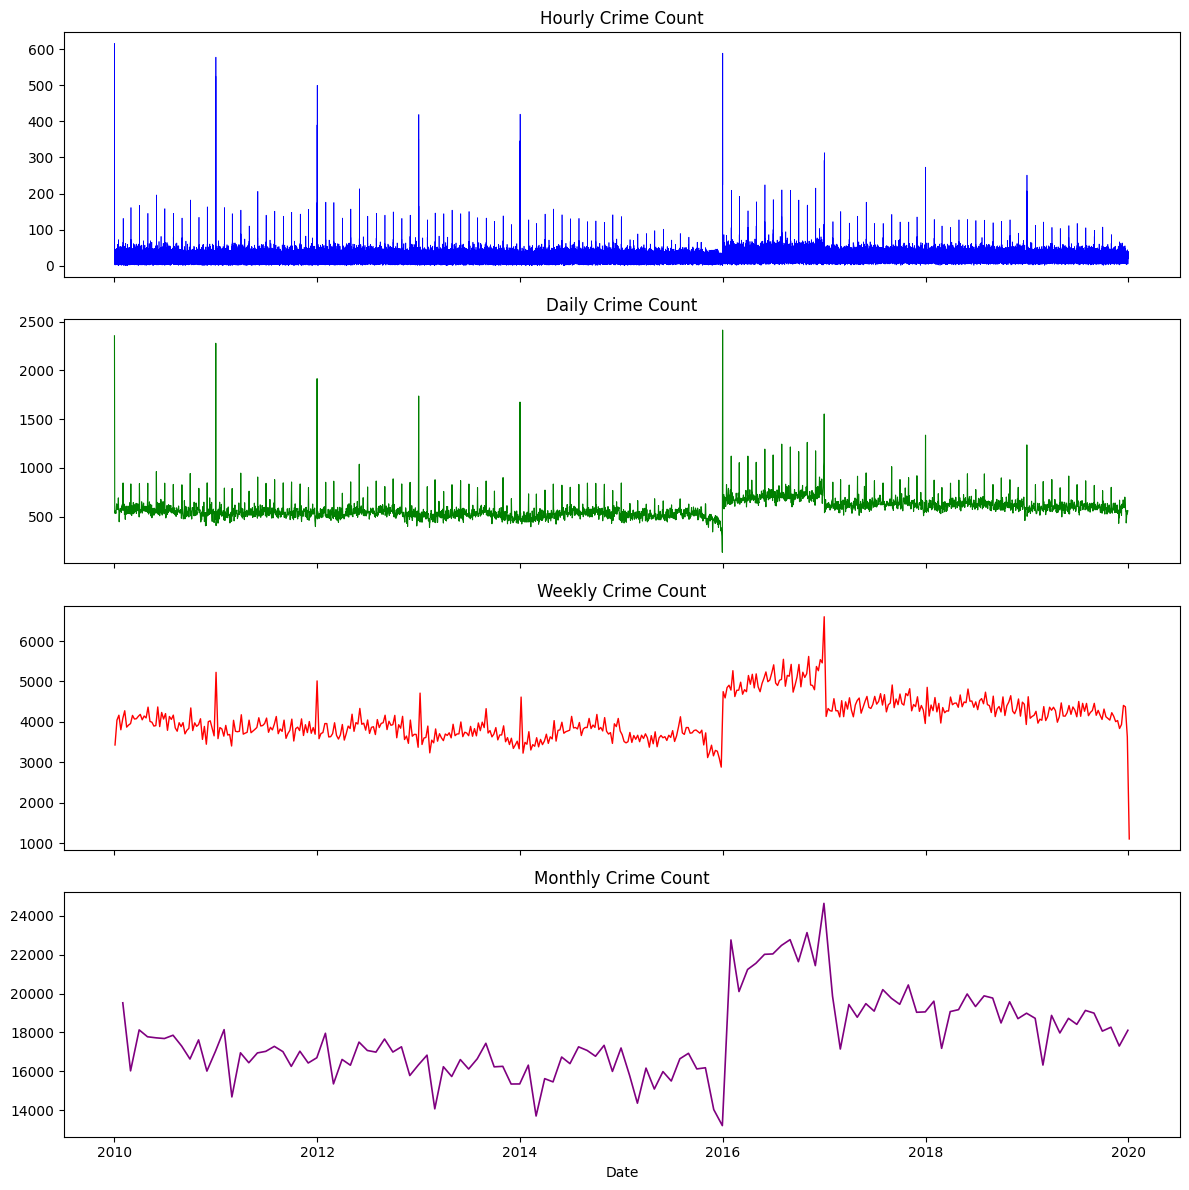

In [ ]:
import matplotlib.pyplot as plt

# Plot crime trends for different granularities
fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Hourly
axes[0].plot(df_hourly['datetime'], df_hourly['crime_count'], color='blue', linewidth=0.5)
axes[0].set_title('Hourly Crime Count')

# Daily
axes[1].plot(df_daily['datetime'], df_daily['crime_count'], color='green', linewidth=0.8)
axes[1].set_title('Daily Crime Count')

# Weekly
axes[2].plot(df_weekly['datetime'], df_weekly['crime_count'], color='red', linewidth=1)
axes[2].set_title('Weekly Crime Count')

# Monthly
axes[3].plot(df_monthly['datetime'], df_monthly['crime_count'], color='purple', linewidth=1.2)
axes[3].set_title('Monthly Crime Count')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title):
    result = adfuller(series.dropna())
    print(f'[{title}] ADF Statistic: {result[0]:.4f}')
    print(f'[{title}] p-value: {result[1]:.4f}')
    print('Stationary' if result[1] < 0.05 else 'Not Stationary')
    print('-' * 50)

# Apply ADF test
adf_test(df_hourly['crime_count'], "Hourly")
adf_test(df_daily['crime_count'], "Daily")
adf_test(df_weekly['crime_count'], "Weekly")
adf_test(df_monthly['crime_count'], "Monthly")


[Hourly] ADF Statistic: -23.3645
[Hourly] p-value: 0.0000
Stationary
--------------------------------------------------
[Daily] ADF Statistic: -2.1681
[Daily] p-value: 0.2180
Not Stationary
--------------------------------------------------
[Weekly] ADF Statistic: -1.7615
[Weekly] p-value: 0.3997
Not Stationary
--------------------------------------------------
[Monthly] ADF Statistic: -2.6765
[Monthly] p-value: 0.0782
Not Stationary
--------------------------------------------------


In [ ]:
# Apply first-order differencing
df_daily_diff = df_daily['crime_count'].diff().dropna()
df_weekly_diff = df_weekly['crime_count'].diff().dropna()
df_monthly_diff = df_monthly['crime_count'].diff().dropna()

# ADF test after differencing
adf_test(df_daily_diff, "Daily (1st Diff)")
adf_test(df_weekly_diff, "Weekly (1st Diff)")
adf_test(df_monthly_diff, "Monthly (1st Diff)")


[Daily (1st Diff)] ADF Statistic: -22.8486
[Daily (1st Diff)] p-value: 0.0000
Stationary
--------------------------------------------------
[Weekly (1st Diff)] ADF Statistic: -5.9148
[Weekly (1st Diff)] p-value: 0.0000
Stationary
--------------------------------------------------
[Monthly (1st Diff)] ADF Statistic: -11.2321
[Monthly (1st Diff)] p-value: 0.0000
Stationary
--------------------------------------------------


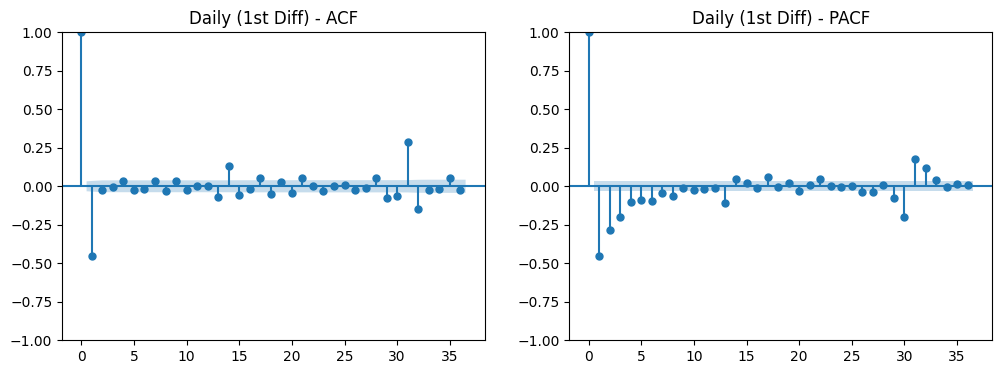

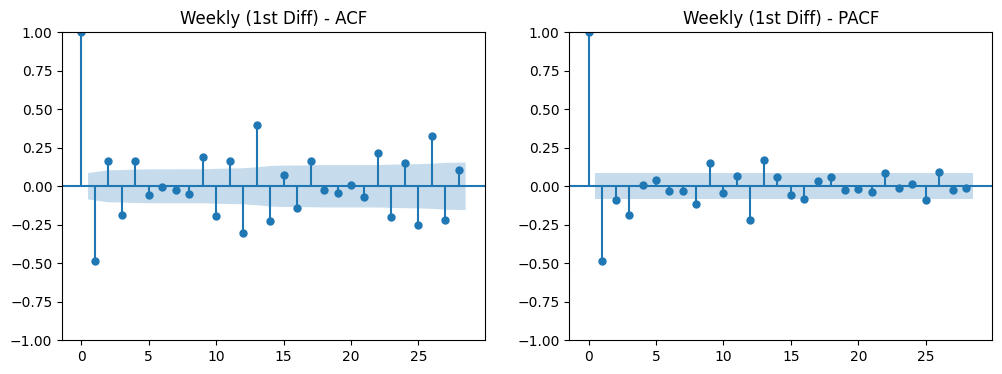

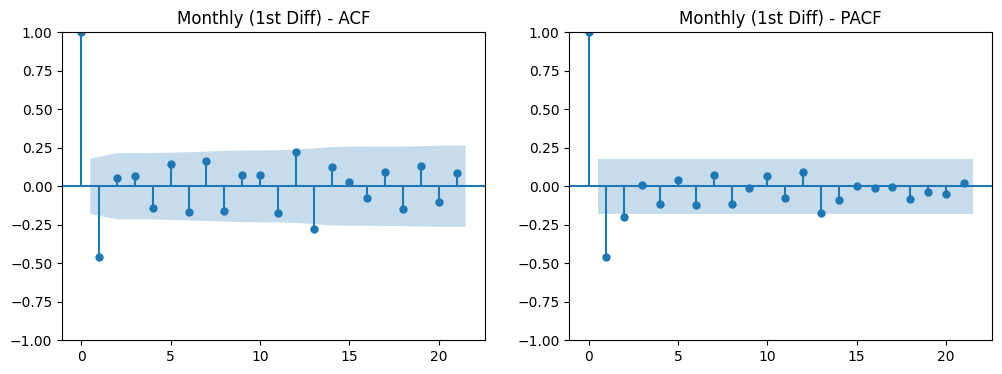

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

def plot_acf_pacf(series, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    plot_acf(series, ax=axes[0], title=f"{title} - ACF")
    plot_pacf(series, ax=axes[1], title=f"{title} - PACF")

    plt.show()

# ACF & PACF for Daily, Weekly, Monthly data
plot_acf_pacf(df_daily_diff, "Daily (1st Diff)")
plot_acf_pacf(df_weekly_diff, "Weekly (1st Diff)")
plot_acf_pacf(df_monthly_diff, "Monthly (1st Diff)")


In [ ]:
!pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
model_hourly = ARIMA(df_hourly['crime_count'], order=(1, 0, 1))
results_hourly = model_hourly.fit()
print(results_hourly.summary())


                               SARIMAX Results                                
Dep. Variable:            crime_count   No. Observations:                87648
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -340284.124
Date:                Thu, 13 Mar 2025   AIC                         680576.248
Time:                        15:42:28   BIC                         680613.773
Sample:                             0   HQIC                        680587.704
                              - 87648                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3380      0.141    172.562      0.000      24.062      24.614
ar.L1          0.8010      0.001    642.748      0.000       0.799       0.803
ma.L1         -0.4250      0.002   -263.893      0.0

In [ ]:
model_daily = ARIMA(df_daily['crime_count'], order=(1, 1, 2))
results_daily = model_daily.fit()
print(results_daily.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            crime_count   No. Observations:                 3652
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -21825.822
Date:                Thu, 13 Mar 2025   AIC                          43659.644
Time:                        15:42:35   BIC                          43684.455
Sample:                             0   HQIC                         43668.480
                               - 3652                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2058      0.344     -0.598      0.550      -0.880       0.469
ma.L1         -0.7239      0.343     -2.114      0.035      -1.395      -0.053
ma.L2         -0.2228      0.326     -0.684      0.4

In [ ]:
model_weekly = ARIMA(df_weekly['crime_count'], order=(2, 1, 2))
results_weekly = model_weekly.fit()
print(results_weekly.summary())

                               SARIMAX Results                                
Dep. Variable:            crime_count   No. Observations:                  523
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3712.244
Date:                Thu, 13 Mar 2025   AIC                           7434.489
Time:                        15:42:35   BIC                           7455.777
Sample:                             0   HQIC                          7442.827
                                - 523                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5618      0.306     -1.837      0.066      -1.161       0.038
ar.L2          0.1024      0.094      1.094      0.274      -0.081       0.286
ma.L1         -0.1630      0.309     -0.527      0.5

In [ ]:
model_monthly = ARIMA(df_monthly['crime_count'], order=(1, 1, 1))
results_monthly = model_monthly.fit()
print(results_monthly.summary())

                               SARIMAX Results                                
Dep. Variable:            crime_count   No. Observations:                  120
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1028.580
Date:                Thu, 13 Mar 2025   AIC                           2063.161
Time:                        15:42:35   BIC                           2071.498
Sample:                             0   HQIC                          2066.547
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2088      0.164     -1.277      0.202      -0.529       0.112
ma.L1         -0.2296      0.188     -1.224      0.221      -0.597       0.138
sigma2      1.871e+06   1.24e+05     15.065      0.0

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

def evaluate_model(actual, predicted, title):
    mse = mean_squared_error(actual, predicted)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actual, predicted)

    print(f'[{title}]')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print('-' * 50)

# Predictions
pred_hourly = results_hourly.fittedvalues
pred_daily = results_daily.fittedvalues
pred_weekly = results_weekly.fittedvalues
pred_monthly = results_monthly.fittedvalues

# Evaluate models
evaluate_model(df_hourly['crime_count'][1:], pred_hourly[1:], "Hourly")
evaluate_model(df_daily['crime_count'][1:], pred_daily[1:], "Daily")
evaluate_model(df_weekly['crime_count'][1:], pred_weekly[1:], "Weekly")
evaluate_model(df_monthly['crime_count'][1:], pred_monthly[1:], "Monthly")


[Hourly]
MSE: 136.3644
RMSE: 11.6775
MAE: 7.2870
--------------------------------------------------
[Daily]
MSE: 9624.6206
RMSE: 98.1052
MAE: 47.0794
--------------------------------------------------
[Weekly]
MSE: 88433.0977
RMSE: 297.3770
MAE: 185.6745
--------------------------------------------------
[Monthly]
MSE: 1885425.0243
RMSE: 1373.1078
MAE: 871.0378
--------------------------------------------------


In [ ]:
# Ensure required library is installed
!pip install prophet

import pandas as pd

# Rename columns for Prophet
df_hourly_prophet = df_hourly.rename(columns={'datetime': 'ds', 'crime_count': 'y'})
df_daily_prophet = df_daily.rename(columns={'datetime': 'ds', 'crime_count': 'y'})
df_weekly_prophet = df_weekly.rename(columns={'datetime': 'ds', 'crime_count': 'y'})
df_monthly_prophet = df_monthly.rename(columns={'datetime': 'ds', 'crime_count': 'y'})

# Convert 'ds' column to datetime format
for df in [df_hourly_prophet, df_daily_prophet, df_weekly_prophet, df_monthly_prophet]:
    df['ds'] = pd.to_datetime(df['ds'])


In [ ]:
from prophet import Prophet

# Function to fit Prophet model
def fit_prophet(df, freq, periods):
    model = Prophet()
    model.fit(df)

    # Create future dataframe for prediction
    future = model.make_future_dataframe(periods=periods, freq=freq)
    forecast = model.predict(future)

    return model, forecast

# Fit Prophet models
model_hourly, forecast_hourly = fit_prophet(df_hourly_prophet, 'H', 24)
model_daily, forecast_daily = fit_prophet(df_daily_prophet, 'D', 30)
model_weekly, forecast_weekly = fit_prophet(df_weekly_prophet, 'W', 12)
model_monthly, forecast_monthly = fit_prophet(df_monthly_prophet, 'M', 12)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpndv4q67c/66zezejq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpndv4q67c/dg3v6pcb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43622', 'data', 'file=/tmp/tmpndv4q67c/66zezejq.json', 'init=/tmp/tmpndv4q67c/dg3v6pcb.json', 'output', 'file=/tmp/tmpndv4q67c/prophet_modelyyyttaz0/prophet_model-20250313154301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:43:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:44:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling daily seasonality. Run proph

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Function to compute errors
def evaluate_forecast(actual, predicted, model_name):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)

    print(f"🔹 {model_name} Performance:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print("-" * 40)

# Evaluate each model
evaluate_forecast(df_hourly_prophet['y'], forecast_hourly['yhat'][:len(df_hourly_prophet)], "Prophet - Hourly")
evaluate_forecast(df_daily_prophet['y'], forecast_daily['yhat'][:len(df_daily_prophet)], "Prophet - Daily")
evaluate_forecast(df_weekly_prophet['y'], forecast_weekly['yhat'][:len(df_weekly_prophet)], "Prophet - Weekly")
evaluate_forecast(df_monthly_prophet['y'], forecast_monthly['yhat'][:len(df_monthly_prophet)], "Prophet - Monthly")


🔹 Prophet - Hourly Performance:
MSE: 106.88
RMSE: 10.34
MAE: 5.79
----------------------------------------
🔹 Prophet - Daily Performance:
MSE: 8677.81
RMSE: 93.15
MAE: 44.14
----------------------------------------
🔹 Prophet - Weekly Performance:
MSE: 107396.04
RMSE: 327.71
MAE: 219.10
----------------------------------------
🔹 Prophet - Monthly Performance:
MSE: 1707715.63
RMSE: 1306.80
MAE: 864.67
----------------------------------------


In [ ]:
# Add Prophet residuals as exogenous variables
df_hourly_prophet['prophet_residual'] = df_hourly_prophet['y'] - forecast_hourly['yhat'][:len(df_hourly_prophet)].values
df_daily_prophet['prophet_residual'] = df_daily_prophet['y'] - forecast_daily['yhat'][:len(df_daily_prophet)].values
df_weekly_prophet['prophet_residual'] = df_weekly_prophet['y'] - forecast_weekly['yhat'][:len(df_weekly_prophet)].values
df_monthly_prophet['prophet_residual'] = df_monthly_prophet['y'] - forecast_monthly['yhat'][:len(df_monthly_prophet)].values


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Function to fit ARIMA with Prophet residuals
def fit_arima_with_exog(df, order):
    exog = df[['prophet_residual']].dropna()
    y = df['y'].iloc[len(df) - len(exog):]  # Align lengths

    model = ARIMA(y, order=order, exog=exog)
    arima_result = model.fit()
    return arima_result

# Fit ARIMA models with Prophet residuals as exogenous variables
arima_hourly = fit_arima_with_exog(df_hourly_prophet, (3,1,1))
arima_daily = fit_arima_with_exog(df_daily_prophet, (5,1,1))
arima_weekly = fit_arima_with_exog(df_weekly_prophet, (2,1,2))
arima_monthly = fit_arima_with_exog(df_monthly_prophet, (1,1,1))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Function to calculate errors
def calculate_errors(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    return mse, rmse, mae

# Compute errors for each model
mse_hourly, rmse_hourly, mae_hourly = calculate_errors(df_hourly_prophet['y'].iloc[-len(arima_hourly.fittedvalues):], arima_hourly.fittedvalues)
mse_daily, rmse_daily, mae_daily = calculate_errors(df_daily_prophet['y'].iloc[-len(arima_daily.fittedvalues):], arima_daily.fittedvalues)
mse_weekly, rmse_weekly, mae_weekly = calculate_errors(df_weekly_prophet['y'].iloc[-len(arima_weekly.fittedvalues):], arima_weekly.fittedvalues)
mse_monthly, rmse_monthly, mae_monthly = calculate_errors(df_monthly_prophet['y'].iloc[-len(arima_monthly.fittedvalues):], arima_monthly.fittedvalues)

# Print results
print("Hourly - MSE:", mse_hourly, "RMSE:", rmse_hourly, "MAE:", mae_hourly)
print("Daily - MSE:", mse_daily, "RMSE:", rmse_daily, "MAE:", mae_daily)
print("Weekly - MSE:", mse_weekly, "RMSE:", rmse_weekly, "MAE:", mae_weekly)
print("Monthly - MSE:", mse_monthly, "RMSE:", rmse_monthly, "MAE:", mae_monthly)


Hourly - MSE: 0.09720049498481455 RMSE: 0.31176993919365376 MAE: 0.2505032033933306
Daily - MSE: 469.6453675768618 RMSE: 21.671302858316153 MAE: 15.55208492272659
Weekly - MSE: 29893.924253484365 RMSE: 172.89859529066268 MAE: 11.506147379020046
Monthly - MSE: 3550030.6165869674 RMSE: 1884.1524929227378 MAE: 887.5213029207066


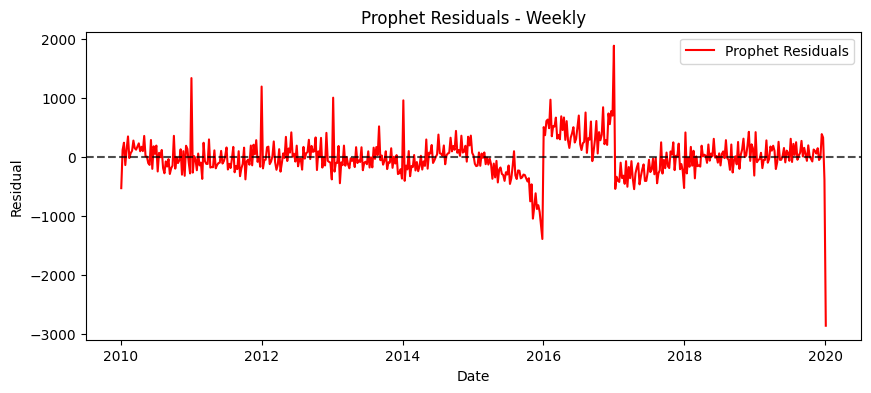

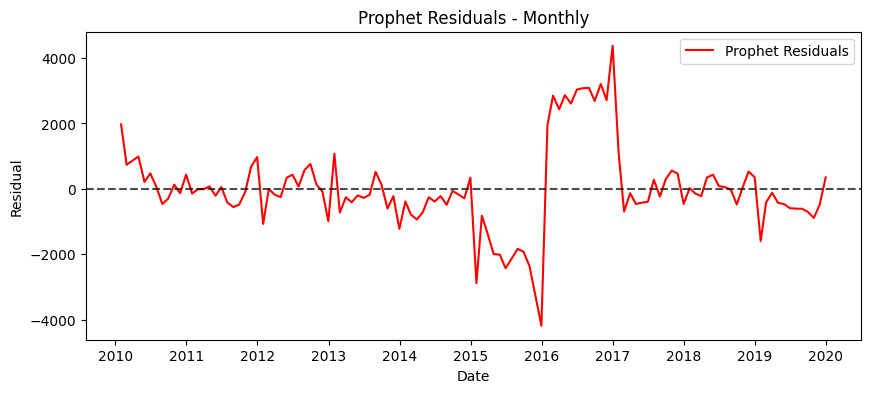

In [ ]:
import matplotlib.pyplot as plt

def plot_residuals(df, title):
    plt.figure(figsize=(10, 4))
    plt.plot(df['ds'], df['prophet_residual'], label='Prophet Residuals', color='red')
    plt.axhline(0, linestyle='--', color='black', alpha=0.7)
    plt.xlabel('Date')
    plt.ylabel('Residual')
    plt.title(title)
    plt.legend()
    plt.show()

plot_residuals(df_weekly_prophet, "Prophet Residuals - Weekly")
plot_residuals(df_monthly_prophet, "Prophet Residuals - Monthly")
